In [52]:
import pandas as pd 
import pyodbc
import sqlalchemy
import datetime as dt
import numpy as np
import openpyxl
from shutil import copyfile
from datetime import datetime
from dateutil.relativedelta import relativedelta
from win32com.client import Dispatch
import os

In [53]:
df_evaluacion_dic = pd.read_excel(r"C:\Users\Lenovo\OneDrive - Storecheck S.A. de C.V\Documentos\Area_Training\Refuerzo_Diciembre_2021.xlsx", sheet_name='Respuestas de formulario 1')

In [54]:
Suma_de_Califs_obtenidas=df_evaluacion_dic.groupby('Calificacion')['Puntuación'].count()
Suma_de_Califs_obtenidas = pd.DataFrame(Suma_de_Califs_obtenidas)
Suma_de_Califs_obtenidas

,Puntuación
Calificacion,
0.5625,2
0.6250,3
0.6875,2
0.7500,2
0.8125,8
0.8750,17
0.9375,39
1.0000,63


In [55]:
Suma_de_Califs_obtenidas['Califs'] = Suma_de_Califs_obtenidas.index
Suma_de_Califs_obtenidas['Calificaciones'] = Suma_de_Califs_obtenidas['Califs']*100
Suma_de_Califs_obtenidas=Suma_de_Califs_obtenidas[['Puntuación', 'Calificaciones']]
Suma_de_Califs_obtenidas = Suma_de_Califs_obtenidas.rename(columns={'Puntuación': 'Suma de calificaciones obtenidas'})
Suma_de_Califs_obtenidas

,Suma de calificaciones obtenidas,Calificaciones
Calificacion,,
0.5625,2,56.25
0.6250,3,62.50
0.6875,2,68.75
0.7500,2,75.00
0.8125,8,81.25
0.8750,17,87.50
0.9375,39,93.75
1.0000,63,100.00


In [56]:
data=df_evaluacion_dic.groupby(['Estudio que evalúas'])['NOMBRE COMPLETO'].count()
data = pd.DataFrame(data)
data.rename(
    columns=({ 'NOMBRE COMPLETO': 'Halcones'}), 
    inplace=True,
)
data

,Halcones
Estudio que evalúas,
ARCA,20
BEPENSA,8
CDF,9
CLAIMS,12
CUENTAS,1
FEMSA,74
NAYAR,2
OTRO,3
RICA,4


In [57]:
data['Index'] = list(range(len(data.index)))
data

,Halcones,Index
Estudio que evalúas,,
ARCA,20,0
BEPENSA,8,1
CDF,9,2
CLAIMS,12,3
CUENTAS,1,4
FEMSA,74,5
NAYAR,2,6
OTRO,3,7
RICA,4,8


In [58]:
data1=df_evaluacion_dic.groupby(['Estudio que evalúas'])['Calificacion'].mean()
data1 = pd.DataFrame(data1)
data1

,Calificacion
Estudio que evalúas,
ARCA,0.940625
BEPENSA,0.929688
CDF,0.923611
CLAIMS,0.942708
CUENTAS,0.812500
FEMSA,0.932432
NAYAR,0.906250
OTRO,0.854167
RICA,0.953125


In [59]:
califs=data1['Calificacion']*100
data1['Califs']=califs
data1

,Calificacion,Califs
Estudio que evalúas,,
ARCA,0.940625,94.062500
BEPENSA,0.929688,92.968750
CDF,0.923611,92.361111
CLAIMS,0.942708,94.270833
CUENTAS,0.812500,81.250000
FEMSA,0.932432,93.243243
NAYAR,0.906250,90.625000
OTRO,0.854167,85.416667
RICA,0.953125,95.312500


In [60]:
califs_round=data1['Califs'].round()
data1['Calificacion_por_embotellador']=califs_round
data1

,Calificacion,Califs,Calificacion_por_embotellador
Estudio que evalúas,,,
ARCA,0.940625,94.062500,94.0
BEPENSA,0.929688,92.968750,93.0
CDF,0.923611,92.361111,92.0
CLAIMS,0.942708,94.270833,94.0
CUENTAS,0.812500,81.250000,81.0
FEMSA,0.932432,93.243243,93.0
NAYAR,0.906250,90.625000,91.0
OTRO,0.854167,85.416667,85.0
RICA,0.953125,95.312500,95.0


In [61]:
data1=data1[['Calificacion_por_embotellador']]
data1

,Calificacion_por_embotellador
Estudio que evalúas,
ARCA,94.0
BEPENSA,93.0
CDF,92.0
CLAIMS,94.0
CUENTAS,81.0
FEMSA,93.0
NAYAR,91.0
OTRO,85.0
RICA,95.0


In [62]:
data1['Index'] = list(range(len(data1.index)))
data1

<ipython-input-62-03859b566d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Index'] = list(range(len(data1.index)))


,Calificacion_por_embotellador,Index
Estudio que evalúas,,
ARCA,94.0,0
BEPENSA,93.0,1
CDF,92.0,2
CLAIMS,94.0,3
CUENTAS,81.0,4
FEMSA,93.0,5
NAYAR,91.0,6
OTRO,85.0,7
RICA,95.0,8


In [63]:
Califs_Por_Embotellador = pd.merge(data, data1, on='Index', how='inner')
Califs_Por_Embotellador=Califs_Por_Embotellador[['Halcones', 'Calificacion_por_embotellador']]
Califs_Por_Embotellador

,Halcones,Calificacion_por_embotellador
0,20,94.0
1,8,93.0
2,9,92.0
3,12,94.0
4,1,81.0
5,74,93.0
6,2,91.0
7,3,85.0
8,4,95.0
9,3,98.0


In [64]:
Califs_Por_Embotellador.rename(index={0:'ARCA',1:'BEPENSA', 2:'CDF', 3:'CLAIMS', 4:'CUENTAS', 5:'FEMSA', 6:'NAYAR', 7:'OTRO', 8:'RICA', 9:'TORRE DE CONTROL'}, inplace=True)
Califs_Por_Embotellador

,Halcones,Calificacion_por_embotellador
ARCA,20,94.0
BEPENSA,8,93.0
CDF,9,92.0
CLAIMS,12,94.0
CUENTAS,1,81.0
FEMSA,74,93.0
NAYAR,2,91.0
OTRO,3,85.0
RICA,4,95.0
TORRE DE CONTROL,3,98.0


In [65]:
Califs_Por_Embotellador=Califs_Por_Embotellador.drop(['CLAIMS', 'CUENTAS', 'OTRO', 'TORRE DE CONTROL'])
Califs_Por_Embotellador

,Halcones,Calificacion_por_embotellador
ARCA,20,94.0
BEPENSA,8,93.0
CDF,9,92.0
FEMSA,74,93.0
NAYAR,2,91.0
RICA,4,95.0


In [66]:
Califs_Por_Embotellador['Embotelladora'] = Califs_Por_Embotellador.index
Califs_Por_Embotellador=Califs_Por_Embotellador[['Embotelladora', 'Halcones', 'Calificacion_por_embotellador']]
Califs_Por_Embotellador

,Embotelladora,Halcones,Calificacion_por_embotellador
ARCA,ARCA,20,94.0
BEPENSA,BEPENSA,8,93.0
CDF,CDF,9,92.0
FEMSA,FEMSA,74,93.0
NAYAR,NAYAR,2,91.0
RICA,RICA,4,95.0


In [67]:
Prom_por_Embotelladoras=Califs_Por_Embotellador["Calificacion_por_embotellador"].mean()
Prom_por_Embotelladoras

93.0

In [68]:
Suma_Halcones=Califs_Por_Embotellador["Halcones"].sum()
Suma_Halcones

117

In [69]:
Prom_por_Embotelladoras = {'Suma_Halcones': [117], 'Prom_por_Embotelladoras': [93.0]}
df_prom = pd.DataFrame(data=Prom_por_Embotelladoras)
df_prom

,Suma_Halcones,Prom_por_Embotelladoras
0,117,93.0


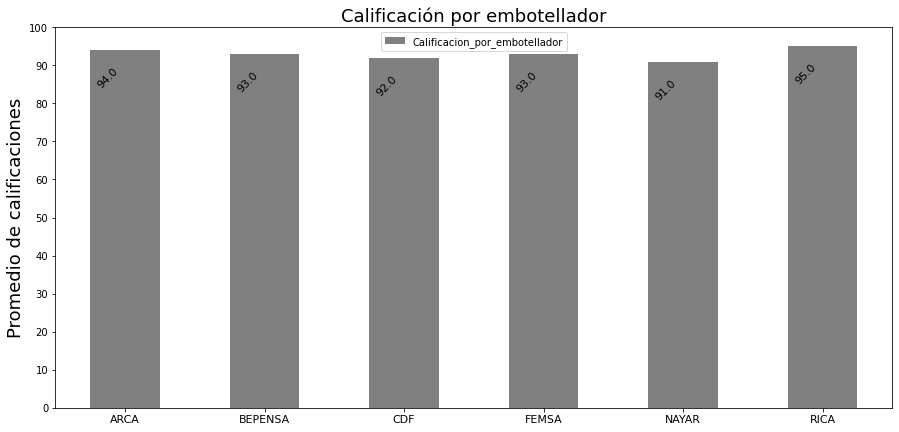

In [70]:
ax = Califs_Por_Embotellador[['Calificacion_por_embotellador']].plot(kind='bar',
              figsize=(15,7), color=['gray'], fontsize=10);
ax.set_alpha(0.8)
ax.set_title("Calificación por embotellador",
fontsize=18)
ax.set_ylabel("Promedio de calificaciones", fontsize=18);
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticklabels(["ARCA", "BEPENSA", 
                    "CDF", "FEMSA", "NAYAR", "RICA"], rotation=0, fontsize=11)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()-10, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=45)

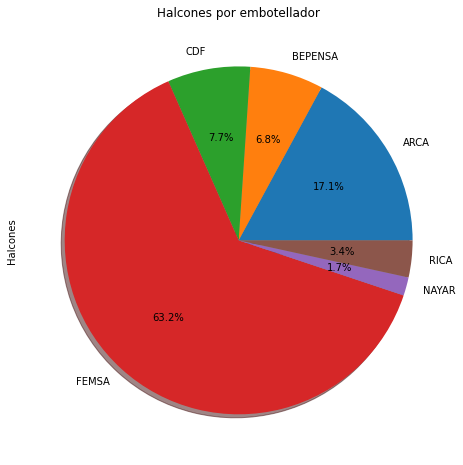

In [71]:
Pie_Plot = Califs_Por_Embotellador.plot.pie(y='Halcones', figsize=(8, 8), title="Halcones por embotellador", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

In [72]:
df_evaluacion_dic_ptEqual20 = df_evaluacion_dic.loc[df_evaluacion_dic['Puntuación'] == 16.0]
df_evaluacion_dic_ptEqual20=df_evaluacion_dic_ptEqual20[['Estudio que evalúas', '1. ¿Qué producto se tomara como valido para plataforma hidratación?', '2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?', '3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?', '4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?', '5. ¿Cuál es el portafolio valido para la plataforma sabores?', '6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?', '7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?', '8. ¿La encuesta de satisfacción de elimina de canal tradicional?', '9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?', '10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?', '11. ¿Qué material se dio de alta para Puestos fijos?', '12. ¿Qué elementos vas a evaluar en la tapa ciega?', '13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?', '14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?', '15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?', '16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?']]

df_evaluacion_dic_ptEqual20=df_evaluacion_dic_ptEqual20.head(1)
df_evaluacion_dic_ptEqual20

,Estudio que evalúas,1. ¿Qué producto se tomara como valido para plataforma hidratación?,2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?,4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?,5. ¿Cuál es el portafolio valido para la plataforma sabores?,6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,8. ¿La encuesta de satisfacción de elimina de canal tradicional?,"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?","10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",11. ¿Qué material se dio de alta para Puestos fijos?,12. ¿Qué elementos vas a evaluar en la tapa ciega?,13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?,14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?,15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?,16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?
0,FEMSA,Agua vitaminada,Cualquier presentación,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Falso,Verdadero,Falso,Ninguna,Verdadero,Tapa ciega,"Bebida, platillo y marca",Falso,Verdadero,Ades Soya,En todas las tiendas que se visiten


In [73]:
df_evaluacion_dic_ptMinus_20 = df_evaluacion_dic.loc[df_evaluacion_dic['Puntuación'] < 16.0]
df_evaluacion_dic_ptMinus_20=df_evaluacion_dic_ptMinus_20[['Estudio que evalúas', '1. ¿Qué producto se tomara como valido para plataforma hidratación?', '2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?', '3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?', '4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?', '5. ¿Cuál es el portafolio valido para la plataforma sabores?', '6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?', '7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?', '8. ¿La encuesta de satisfacción de elimina de canal tradicional?', '9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?', '10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?', '11. ¿Qué material se dio de alta para Puestos fijos?', '12. ¿Qué elementos vas a evaluar en la tapa ciega?', '13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?', '14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?', '15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?', '16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?']]

df_evaluacion_dic_ptMinus_20

,Estudio que evalúas,1. ¿Qué producto se tomara como valido para plataforma hidratación?,2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?,4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?,5. ¿Cuál es el portafolio valido para la plataforma sabores?,6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,8. ¿La encuesta de satisfacción de elimina de canal tradicional?,"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?","10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",11. ¿Qué material se dio de alta para Puestos fijos?,12. ¿Qué elementos vas a evaluar en la tapa ciega?,13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?,14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?,15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?,16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?
1,FEMSA,Agua vitaminada,Personal,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Falso,Verdadero,Falso,Ninguna,Verdadero,Tapa ciega,"Bebida, platillo y marca",Falso,Verdadero,Ades Soya,En todas las tiendas que se visiten
2,FEMSA,Agua vitaminada,Cualquier presentación,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Falso,Verdadero,Falso,Ninguna,Verdadero,Tapa ciega,"Bebidas, patillo, precio y marca",Falso,Verdadero,Ades Soya,En todas las tiendas que se visiten
3,FEMSA,Agua vitaminada,Cualquier presentación,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Falso,Verdadero,Falso,Ninguna,Verdadero,Tapa ciega,"Bebida, platillo y marca",Falso,Verdadero,Ades Soya,Solo en los bodega aurrera y mercados soriana
5,ARCA,Agua vitaminada,Familiar,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Falso,Verdadero,Verdadero,Ninguna,Verdadero,Tapa ciega,"Bebidas, patillo, precio y marca",Verdadero,Falso,Ades Soya,Solo en los bodega aurrrera
9,FEMSA,Agua vitaminada,Cualquier presentación,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Falso,Verdadero,Falso,Ninguna,Falso,Tapa ciega,"Bebida, platillo y marca",Falso,Verdadero,Ades Soya,En todas las tiendas que se visiten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,FEMSA,Agua vitaminada,Cualquier presentación,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Verdadero,Verdadero,Falso,Ninguna,Verdadero,Tapa ciega,"Bebida, platillo y marca",Falso,Verdadero,Ades Soya,En todas las tiendas que se visiten
128,FEMSA,Agua vitaminada,Cualquier presentación,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Verdadero,Verdadero,Verdadero,Ninguna,Verdadero,Tapa ciega,"Bebida, platillo y marca",Verdadero,Verdadero,Ades Soya,En todas las tiendas que se visiten
130,ARCA,Agua vitaminada,Cualquier presentación,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Verdadero,Verdadero,Falso,Ninguna,Falso,Tapa ciega,"Bebida, platillo y marca",Verdadero,Verdadero,Ades Soya,Solo en los bodega aurrrera
132,FEMSA,Agua vitaminada,Cualquier presentación,Fiestas Patrias,Sabores,"Todos los refrescos de sabor, personales y fam...",Falso,Verdadero,Falso,Fiestas patrias,Verdadero,Tapa ciega,"Bebida, platillo y marca",Verdadero,Verdadero,Ades Soya,En todas las tiendas que se visiten


In [74]:
df3_1  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="1. ¿Qué producto se tomara como valido para plataforma hidratación?", how='outer', indicator='Exist')
df3_1  = df3_1.loc[df3_1['Exist'] != 'both']
df3_1 = len(df3_1)
df3_1

1

In [75]:
df3_2  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?", how='outer', indicator='Exist')
df3_2  = df3_2.loc[df3_2['Exist'] != 'both']
df3_2 = len(df3_2)
df3_2

20

In [76]:
df3_3  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?", how='outer', indicator='Exist')
df3_3  = df3_3.loc[df3_3['Exist'] != 'both']
df3_3 = len(df3_3)
df3_3

2

In [77]:
df3_4  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?", how='outer', indicator='Exist')
df3_4  = df3_4.loc[df3_4['Exist'] != 'both']
df3_4 = len(df3_4)
df3_4

1

In [78]:
df3_5  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="5. ¿Cuál es el portafolio valido para la plataforma sabores?", how='outer', indicator='Exist')
df3_5  = df3_5.loc[df3_5['Exist'] != 'both']
df3_5 = len(df3_5)
df3_5

6

In [79]:
df3_6  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df3_6  = df3_6.loc[df3_6['Exist'] != 'both']
df3_6 = len(df3_6)
df3_6

24

In [80]:
df3_7  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df3_7  = df3_7.loc[df3_7['Exist'] != 'both']
df3_7 = len(df3_7)
df3_7

0

In [81]:
df3_8  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="8. ¿La encuesta de satisfacción de elimina de canal tradicional?", how='outer', indicator='Exist')
df3_8  = df3_8.loc[df3_8['Exist'] != 'both']
df3_8 = len(df3_8)
df3_8

9

In [82]:
df3_9  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?", how='outer', indicator='Exist')
df3_9  = df3_9.loc[df3_9['Exist'] != 'both']
df3_9 = len(df3_9)
df3_9

8

In [83]:
df3_10  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?", how='outer', indicator='Exist')
df3_10  = df3_10.loc[df3_10['Exist'] != 'both']
df3_10 = len(df3_10)
df3_10

18

In [84]:
df3_11  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="11. ¿Qué material se dio de alta para Puestos fijos?", how='outer', indicator='Exist')
df3_11  = df3_11.loc[df3_11['Exist'] != 'both']
df3_11 = len(df3_11)
df3_11

2

In [85]:
df3_12  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="12. ¿Qué elementos vas a evaluar en la tapa ciega?", how='outer', indicator='Exist')
df3_12  = df3_12.loc[df3_12['Exist'] != 'both']
df3_12 = len(df3_12)
df3_12

12

In [86]:
df3_13  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df3_13  = df3_13.loc[df3_13['Exist'] != 'both']
df3_13 = len(df3_13)
df3_13

20

In [88]:
df3_14  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df3_14  = df3_14.loc[df3_14['Exist'] != 'both']
df3_14 = len(df3_14)
df3_14

3

In [87]:
df3_15  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?", how='outer', indicator='Exist')
df3_15  = df3_15.loc[df3_15['Exist'] != 'both']
df3_15 = len(df3_15)
df3_15

3

In [89]:
df3_16  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20, on="16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?", how='outer', indicator='Exist')
df3_16  = df3_16.loc[df3_16['Exist'] != 'both']
df3_16 = len(df3_16)
df3_16

18

In [90]:
d = {'index1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 'Num_Errores': [1,20,2,1,6,24,0,9,8,18,2,12,20,3,3,18]}
df_Quiz = pd.DataFrame(data=d)
df_Quiz

,index1,Num_Errores
0,1,1
1,2,20
2,3,2
3,4,1
4,5,6
5,6,24
6,7,0
7,8,9
8,9,8
9,10,18


In [91]:
df_evaluacion_dic_ptEqual20=df_evaluacion_dic_ptEqual20[['1. ¿Qué producto se tomara como valido para plataforma hidratación?', '2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?', '3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?', '4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?', '5. ¿Cuál es el portafolio valido para la plataforma sabores?', '6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?', '7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?', '8. ¿La encuesta de satisfacción de elimina de canal tradicional?', '9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?', '10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?', '11. ¿Qué material se dio de alta para Puestos fijos?', '12. ¿Qué elementos vas a evaluar en la tapa ciega?', '13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?', '14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?', '15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?', '16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?']]

df_t = df_evaluacion_dic_ptEqual20.T
df_t

,0
1. ¿Qué producto se tomara como valido para plataforma hidratación?,Agua vitaminada
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,Cualquier presentación
3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?,Fiestas Patrias
4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?,Sabores
5. ¿Cuál es el portafolio valido para la plataforma sabores?,"Todos los refrescos de sabor, personales y fam..."
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,Falso
7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,Verdadero
8. ¿La encuesta de satisfacción de elimina de canal tradicional?,Falso
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?",Ninguna
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",Verdadero


In [92]:
df_t=df_t.drop([0], axis = 1)
df_t

""
1. ¿Qué producto se tomara como valido para plataforma hidratación?
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?
3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?
4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?
5. ¿Cuál es el portafolio valido para la plataforma sabores?
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?
7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?
8. ¿La encuesta de satisfacción de elimina de canal tradicional?
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?"
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?"


In [93]:
index1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

df_t['index1'] = index1
df_t

,index1
1. ¿Qué producto se tomara como valido para plataforma hidratación?,1
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,2
3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?,3
4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?,4
5. ¿Cuál es el portafolio valido para la plataforma sabores?,5
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,6
7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,7
8. ¿La encuesta de satisfacción de elimina de canal tradicional?,8
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?",9
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",10


In [94]:
df_t['index1'] = df_t.index
index1 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

df_t['index1'] = index1

df_t['Preguntas'] = df_t.index
df_t

,index1,Preguntas
1. ¿Qué producto se tomara como valido para plataforma hidratación?,1,1. ¿Qué producto se tomara como valido para pl...
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,2,2. ¿Qué tamaño de empaque se tomara como valid...
3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?,3,3. ¿Qué plataforma ya no se evaluara en el mes...
4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?,4,4. ¿Cuál es el nombre de la nueva plataforma q...
5. ¿Cuál es el portafolio valido para la plataforma sabores?,5,5. ¿Cuál es el portafolio valido para la plata...
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,6,6. ¿Por favor indica si el siguiente portafoli...
7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,7,7. ¿Por favor indica si el siguiente portafoli...
8. ¿La encuesta de satisfacción de elimina de canal tradicional?,8,8. ¿La encuesta de satisfacción de elimina de ...
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?",9,9. ¿En caso de encontrar una exhibición como l...
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",10,"10. ¿La encuesta de satisfacción, se elimina d..."


In [95]:
df=df_Quiz.merge(df_t, how='inner', on='index1')
df

,index1,Num_Errores,Preguntas
0,1,1,1. ¿Qué producto se tomara como valido para pl...
1,2,20,2. ¿Qué tamaño de empaque se tomara como valid...
2,3,2,3. ¿Qué plataforma ya no se evaluara en el mes...
3,4,1,4. ¿Cuál es el nombre de la nueva plataforma q...
4,5,6,5. ¿Cuál es el portafolio valido para la plata...
5,6,24,6. ¿Por favor indica si el siguiente portafoli...
6,7,0,7. ¿Por favor indica si el siguiente portafoli...
7,8,9,8. ¿La encuesta de satisfacción de elimina de ...
8,9,8,9. ¿En caso de encontrar una exhibición como l...
9,10,18,"10. ¿La encuesta de satisfacción, se elimina d..."


In [96]:
df=df[['Preguntas', 'index1', 'Num_Errores']]
df

,Preguntas,index1,Num_Errores
0,1. ¿Qué producto se tomara como valido para pl...,1,1
1,2. ¿Qué tamaño de empaque se tomara como valid...,2,20
2,3. ¿Qué plataforma ya no se evaluara en el mes...,3,2
3,4. ¿Cuál es el nombre de la nueva plataforma q...,4,1
4,5. ¿Cuál es el portafolio valido para la plata...,5,6
5,6. ¿Por favor indica si el siguiente portafoli...,6,24
6,7. ¿Por favor indica si el siguiente portafoli...,7,0
7,8. ¿La encuesta de satisfacción de elimina de ...,8,9
8,9. ¿En caso de encontrar una exhibición como l...,9,8
9,"10. ¿La encuesta de satisfacción, se elimina d...",10,18


In [97]:
df = df.set_index('index1')
df

,Preguntas,Num_Errores
index1,,
1,1. ¿Qué producto se tomara como valido para pl...,1
2,2. ¿Qué tamaño de empaque se tomara como valid...,20
3,3. ¿Qué plataforma ya no se evaluara en el mes...,2
4,4. ¿Cuál es el nombre de la nueva plataforma q...,1
5,5. ¿Cuál es el portafolio valido para la plata...,6
6,6. ¿Por favor indica si el siguiente portafoli...,24
7,7. ¿Por favor indica si el siguiente portafoli...,0
8,8. ¿La encuesta de satisfacción de elimina de ...,9
9,9. ¿En caso de encontrar una exhibición como l...,8


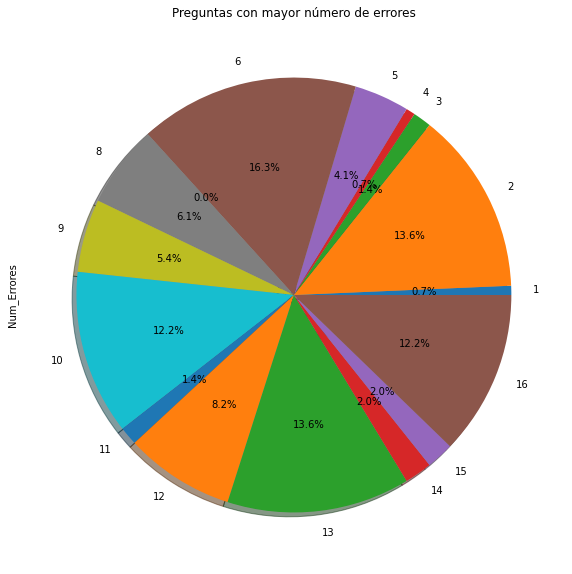

In [98]:
Pie_Plot2 = df.plot.pie(y='Num_Errores', figsize=(10, 10), title="Preguntas con mayor número de errores", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

In [103]:
df_mayores  = df.loc[df['Num_Errores'] > 9]
df_mayores

,Preguntas,Num_Errores
index1,,
2,2. ¿Qué tamaño de empaque se tomara como valid...,20
6,6. ¿Por favor indica si el siguiente portafoli...,24
10,"10. ¿La encuesta de satisfacción, se elimina d...",18
12,12. ¿Qué elementos vas a evaluar en la tapa ci...,12
13,13. ¿En la siguiente exhibición se debe de mar...,20
16,16. ¿En que cadenas se deben de tomar las foto...,18


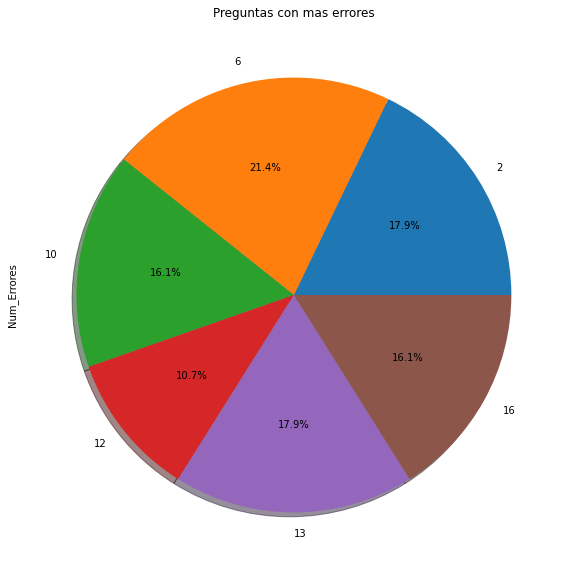

In [104]:
Pie_Plot2 = df_mayores.plot.pie(y='Num_Errores', figsize=(10, 10), title="Preguntas con mas errores", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

In [ ]:
ARCA	ARCA	15	97.0
BEPENSA	BEPENSA	9	95.0
CDF	CDF	11	96.0
FEMSA	FEMSA	74	97.0
NAYAR	NAYAR	1	95.0
NOGALES	NOGALES	1	95.0
RICA

In [102]:
###############################################################################################################
##       ARCA
###############################################################################################################

In [105]:
df_evaluacion_dic_ptMinus_20_ARCA = df_evaluacion_dic_ptMinus_20.loc[df_evaluacion_dic_ptMinus_20['Estudio que evalúas'] == "ARCA"]

In [106]:
df4_1  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="1. ¿Qué producto se tomara como valido para plataforma hidratación?", how='outer', indicator='Exist')
df4_1  = df4_1.loc[df4_1['Exist'] != 'both']
df4_1 = len(df4_1)
print("Pregunta 1:")
print(df4_1)

df4_2  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?", how='outer', indicator='Exist')
df4_2  = df4_2.loc[df4_2['Exist'] != 'both']
df4_2 = len(df4_2)
print("Pregunta 2:")
print(df4_2)

df4_3  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?", how='outer', indicator='Exist')
df4_3  = df4_3.loc[df4_3['Exist'] != 'both']
df4_3 = len(df4_3)
print("Pregunta 3:")
print(df4_3)

df4_4  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?", how='outer', indicator='Exist')
df4_4  = df4_4.loc[df4_4['Exist'] != 'both']
df4_4 = len(df4_4)
print("Pregunta 4:")
print(df4_4)

df4_5  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="5. ¿Cuál es el portafolio valido para la plataforma sabores?", how='outer', indicator='Exist')
df4_5  = df4_5.loc[df4_5['Exist'] != 'both']
df4_5 = len(df4_5)
print("Pregunta 5:")
print(df4_5)

df4_6  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_6  = df4_6.loc[df4_6['Exist'] != 'both']
df4_6 = len(df4_6)
print("Pregunta 6:")
print(df4_6)

df4_7  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_7  = df4_7.loc[df4_7['Exist'] != 'both']
df4_7 = len(df4_7)
print("Pregunta 7:")
print(df4_7)

df4_8  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="8. ¿La encuesta de satisfacción de elimina de canal tradicional?", how='outer', indicator='Exist')
df4_8  = df4_8.loc[df4_8['Exist'] != 'both']
df4_8 = len(df4_8)
print("Pregunta 8:")
print(df4_8)

df4_9  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?", how='outer', indicator='Exist')
df4_9  = df4_9.loc[df4_9['Exist'] != 'both']
df4_9 = len(df4_9)
print("Pregunta 9:")
print(df4_9)

df4_10  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?", how='outer', indicator='Exist')
df4_10  = df4_10.loc[df4_10['Exist'] != 'both']
df4_10 = len(df4_10)
print("Pregunta 10:")
print(df4_10)

df4_11  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="11. ¿Qué material se dio de alta para Puestos fijos?", how='outer', indicator='Exist')
df4_11  = df4_11.loc[df4_11['Exist'] != 'both']
df4_11 = len(df4_11)
print("Pregunta 11:")
print(df4_11)

df4_12  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="12. ¿Qué elementos vas a evaluar en la tapa ciega?", how='outer', indicator='Exist')
df4_12  = df4_12.loc[df4_12['Exist'] != 'both']
df4_12 = len(df4_12)
print("Pregunta 12:")
print(df4_12)

df4_13  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_13  = df4_13.loc[df4_13['Exist'] != 'both']
df4_13 = len(df4_13)
print("Pregunta 13:")
print(df4_13)

df4_14  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_14  = df4_14.loc[df4_14['Exist'] != 'both']
df4_14 = len(df4_14)
print("Pregunta 14:")
print(df4_14)

df4_15  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?", how='outer', indicator='Exist')
df4_15  = df4_15.loc[df4_15['Exist'] != 'both']
df4_15 = len(df4_15)
print("Pregunta 15:")
print(df4_15)

df4_16  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_ARCA, on="16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?", how='outer', indicator='Exist')
df4_16  = df4_16.loc[df4_16['Exist'] != 'both']
df4_16 = len(df4_16)
print("Pregunta 16:")
print(df4_16)


Pregunta 1:
0
Pregunta 2:
2
Pregunta 3:
0
Pregunta 4:
0
Pregunta 5:
0
Pregunta 6:
2
Pregunta 7:
0
Pregunta 8:
2
Pregunta 9:
2
Pregunta 10:
2
Pregunta 11:
0
Pregunta 12:
2
Pregunta 13:
3
Pregunta 14:
1
Pregunta 15:
1
Pregunta 16:
2


In [107]:
dff = {'index1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 'Num_Errores_Arca': [0,2,0,0,0,2,0,2,2,2,0,2,3,1,1,2]}
df_Arca_Quiz = pd.DataFrame(data=dff)
df_Arca_Quiz

,index1,Num_Errores_Arca
0,1,0
1,2,2
2,3,0
3,4,0
4,5,0
5,6,2
6,7,0
7,8,2
8,9,2
9,10,2


In [108]:
df_t['Preguntas'] = df_t.index
df_t

,index1,Preguntas
1. ¿Qué producto se tomara como valido para plataforma hidratación?,1,1. ¿Qué producto se tomara como valido para pl...
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,2,2. ¿Qué tamaño de empaque se tomara como valid...
3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?,3,3. ¿Qué plataforma ya no se evaluara en el mes...
4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?,4,4. ¿Cuál es el nombre de la nueva plataforma q...
5. ¿Cuál es el portafolio valido para la plataforma sabores?,5,5. ¿Cuál es el portafolio valido para la plata...
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,6,6. ¿Por favor indica si el siguiente portafoli...
7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,7,7. ¿Por favor indica si el siguiente portafoli...
8. ¿La encuesta de satisfacción de elimina de canal tradicional?,8,8. ¿La encuesta de satisfacción de elimina de ...
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?",9,9. ¿En caso de encontrar una exhibición como l...
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",10,"10. ¿La encuesta de satisfacción, se elimina d..."


In [109]:
df_Arca=df_Arca_Quiz.merge(df_t, how='inner', on='index1')
df_Arca

,index1,Num_Errores_Arca,Preguntas
0,1,0,1. ¿Qué producto se tomara como valido para pl...
1,2,2,2. ¿Qué tamaño de empaque se tomara como valid...
2,3,0,3. ¿Qué plataforma ya no se evaluara en el mes...
3,4,0,4. ¿Cuál es el nombre de la nueva plataforma q...
4,5,0,5. ¿Cuál es el portafolio valido para la plata...
5,6,2,6. ¿Por favor indica si el siguiente portafoli...
6,7,0,7. ¿Por favor indica si el siguiente portafoli...
7,8,2,8. ¿La encuesta de satisfacción de elimina de ...
8,9,2,9. ¿En caso de encontrar una exhibición como l...
9,10,2,"10. ¿La encuesta de satisfacción, se elimina d..."


In [110]:
df_Arca=df_Arca[['Preguntas', 'Num_Errores_Arca']]
df_Arca

,Preguntas,Num_Errores_Arca
0,1. ¿Qué producto se tomara como valido para pl...,0
1,2. ¿Qué tamaño de empaque se tomara como valid...,2
2,3. ¿Qué plataforma ya no se evaluara en el mes...,0
3,4. ¿Cuál es el nombre de la nueva plataforma q...,0
4,5. ¿Cuál es el portafolio valido para la plata...,0
5,6. ¿Por favor indica si el siguiente portafoli...,2
6,7. ¿Por favor indica si el siguiente portafoli...,0
7,8. ¿La encuesta de satisfacción de elimina de ...,2
8,9. ¿En caso de encontrar una exhibición como l...,2
9,"10. ¿La encuesta de satisfacción, se elimina d...",2


In [111]:
df_Arca_not_NULL  = df_Arca.loc[df_Arca['Num_Errores_Arca'] > 1]
df_Arca_not_NULL

,Preguntas,Num_Errores_Arca
1,2. ¿Qué tamaño de empaque se tomara como valid...,2
5,6. ¿Por favor indica si el siguiente portafoli...,2
7,8. ¿La encuesta de satisfacción de elimina de ...,2
8,9. ¿En caso de encontrar una exhibición como l...,2
9,"10. ¿La encuesta de satisfacción, se elimina d...",2
11,12. ¿Qué elementos vas a evaluar en la tapa ci...,2
12,13. ¿En la siguiente exhibición se debe de mar...,3
15,16. ¿En que cadenas se deben de tomar las foto...,2


In [112]:
df_Arca_Quiz = df_Arca_not_NULL.set_index('Preguntas')
df_Arca_Quiz

,Num_Errores_Arca
Preguntas,
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,2
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,2
8. ¿La encuesta de satisfacción de elimina de canal tradicional?,2
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?",2
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",2
12. ¿Qué elementos vas a evaluar en la tapa ciega?,2
13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?,3
16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?,2


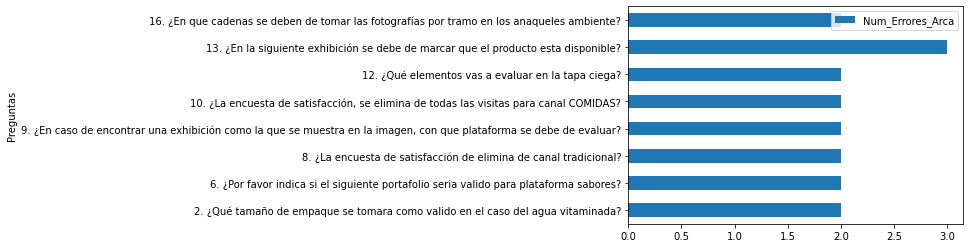

In [113]:
Pax = df_Arca_Quiz.plot.barh(y='Num_Errores_Arca', rot=0)

In [114]:
###############################################################################################################
##       BEPENSA
###############################################################################################################

In [115]:
df_evaluacion_dic_ptMinus_20_BEPENSA = df_evaluacion_dic_ptMinus_20.loc[df_evaluacion_dic_ptMinus_20['Estudio que evalúas'] == "BEPENSA"]


In [116]:
df4_1  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="1. ¿Qué producto se tomara como valido para plataforma hidratación?", how='outer', indicator='Exist')
df4_1  = df4_1.loc[df4_1['Exist'] != 'both']
df4_1 = len(df4_1)
print("Pregunta 1:")
print(df4_1)

df4_2  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?", how='outer', indicator='Exist')
df4_2  = df4_2.loc[df4_2['Exist'] != 'both']
df4_2 = len(df4_2)
print("Pregunta 2:")
print(df4_2)

df4_3  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?", how='outer', indicator='Exist')
df4_3  = df4_3.loc[df4_3['Exist'] != 'both']
df4_3 = len(df4_3)
print("Pregunta 3:")
print(df4_3)

df4_4  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?", how='outer', indicator='Exist')
df4_4  = df4_4.loc[df4_4['Exist'] != 'both']
df4_4 = len(df4_4)
print("Pregunta 4:")
print(df4_4)

df4_5  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="5. ¿Cuál es el portafolio valido para la plataforma sabores?", how='outer', indicator='Exist')
df4_5  = df4_5.loc[df4_5['Exist'] != 'both']
df4_5 = len(df4_5)
print("Pregunta 5:")
print(df4_5)

df4_6  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_6  = df4_6.loc[df4_6['Exist'] != 'both']
df4_6 = len(df4_6)
print("Pregunta 6:")
print(df4_6)

df4_7  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_7  = df4_7.loc[df4_7['Exist'] != 'both']
df4_7 = len(df4_7)
print("Pregunta 7:")
print(df4_7)

df4_8  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="8. ¿La encuesta de satisfacción de elimina de canal tradicional?", how='outer', indicator='Exist')
df4_8  = df4_8.loc[df4_8['Exist'] != 'both']
df4_8 = len(df4_8)
print("Pregunta 8:")
print(df4_8)

df4_9  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?", how='outer', indicator='Exist')
df4_9  = df4_9.loc[df4_9['Exist'] != 'both']
df4_9 = len(df4_9)
print("Pregunta 9:")
print(df4_9)

df4_10  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?", how='outer', indicator='Exist')
df4_10  = df4_10.loc[df4_10['Exist'] != 'both']
df4_10 = len(df4_10)
print("Pregunta 10:")
print(df4_10)

df4_11  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="11. ¿Qué material se dio de alta para Puestos fijos?", how='outer', indicator='Exist')
df4_11  = df4_11.loc[df4_11['Exist'] != 'both']
df4_11 = len(df4_11)
print("Pregunta 11:")
print(df4_11)

df4_12  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="12. ¿Qué elementos vas a evaluar en la tapa ciega?", how='outer', indicator='Exist')
df4_12  = df4_12.loc[df4_12['Exist'] != 'both']
df4_12 = len(df4_12)
print("Pregunta 12:")
print(df4_12)

df4_13  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_13  = df4_13.loc[df4_13['Exist'] != 'both']
df4_13 = len(df4_13)
print("Pregunta 13:")
print(df4_13)

df4_14  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_14  = df4_14.loc[df4_14['Exist'] != 'both']
df4_14 = len(df4_14)
print("Pregunta 14:")
print(df4_14)

df4_15  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?", how='outer', indicator='Exist')
df4_15  = df4_15.loc[df4_15['Exist'] != 'both']
df4_15 = len(df4_15)
print("Pregunta 15:")
print(df4_15)

df4_16  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_BEPENSA, on="16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?", how='outer', indicator='Exist')
df4_16  = df4_16.loc[df4_16['Exist'] != 'both']
df4_16 = len(df4_16)
print("Pregunta 16:")
print(df4_16)

Pregunta 1:
0
Pregunta 2:
1
Pregunta 3:
0
Pregunta 4:
1
Pregunta 5:
0
Pregunta 6:
0
Pregunta 7:
0
Pregunta 8:
0
Pregunta 9:
1
Pregunta 10:
4
Pregunta 11:
1
Pregunta 12:
0
Pregunta 13:
1
Pregunta 14:
0
Pregunta 15:
0
Pregunta 16:
1


In [117]:
dff = {'index1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 'Num_Errores_BEPENSA': [0,1,0,1,0,0,0,0,1,4,1,0,1,0,0,1]}
df_BEPENSA_Quiz = pd.DataFrame(data=dff)
df_BEPENSA_Quiz

,index1,Num_Errores_BEPENSA
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,1
9,10,4


In [118]:
df_BEPENSA=df_BEPENSA_Quiz.merge(df_t, how='inner', on='index1')
df_BEPENSA

,index1,Num_Errores_BEPENSA,Preguntas
0,1,0,1. ¿Qué producto se tomara como valido para pl...
1,2,1,2. ¿Qué tamaño de empaque se tomara como valid...
2,3,0,3. ¿Qué plataforma ya no se evaluara en el mes...
3,4,1,4. ¿Cuál es el nombre de la nueva plataforma q...
4,5,0,5. ¿Cuál es el portafolio valido para la plata...
5,6,0,6. ¿Por favor indica si el siguiente portafoli...
6,7,0,7. ¿Por favor indica si el siguiente portafoli...
7,8,0,8. ¿La encuesta de satisfacción de elimina de ...
8,9,1,9. ¿En caso de encontrar una exhibición como l...
9,10,4,"10. ¿La encuesta de satisfacción, se elimina d..."


In [119]:
df_BEPENSA=df_BEPENSA[['Preguntas', 'Num_Errores_BEPENSA']]
df_BEPENSA

,Preguntas,Num_Errores_BEPENSA
0,1. ¿Qué producto se tomara como valido para pl...,0
1,2. ¿Qué tamaño de empaque se tomara como valid...,1
2,3. ¿Qué plataforma ya no se evaluara en el mes...,0
3,4. ¿Cuál es el nombre de la nueva plataforma q...,1
4,5. ¿Cuál es el portafolio valido para la plata...,0
5,6. ¿Por favor indica si el siguiente portafoli...,0
6,7. ¿Por favor indica si el siguiente portafoli...,0
7,8. ¿La encuesta de satisfacción de elimina de ...,0
8,9. ¿En caso de encontrar una exhibición como l...,1
9,"10. ¿La encuesta de satisfacción, se elimina d...",4


In [120]:
df_BEPENSA_not_NULL  = df_BEPENSA.loc[df_BEPENSA['Num_Errores_BEPENSA'] > 1]
df_BEPENSA_not_NULL

,Preguntas,Num_Errores_BEPENSA
9,"10. ¿La encuesta de satisfacción, se elimina d...",4


In [121]:
df_BEPENSA_Quiz = df_BEPENSA_not_NULL.set_index('Preguntas')
df_BEPENSA_Quiz

,Num_Errores_BEPENSA
Preguntas,
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",4


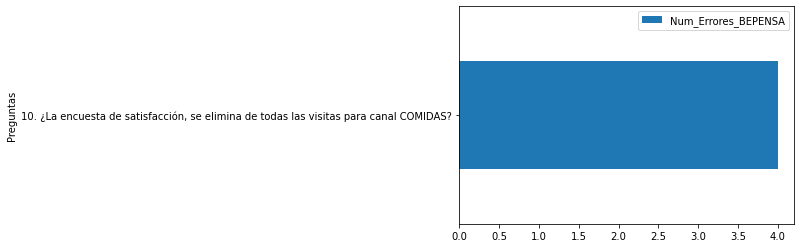

In [122]:
Pax = df_BEPENSA_Quiz.plot.barh(y='Num_Errores_BEPENSA', rot=0)

In [123]:
##############################################################################################################
##       CDF ["ARCA", "BEPENSA", 
             #       "CDF", "FEMSA", "NAYAR", "RICA"]
###############################################################################################################

In [124]:
df_evaluacion_dic_ptMinus_20_CDF = df_evaluacion_dic_ptMinus_20.loc[df_evaluacion_dic_ptMinus_20['Estudio que evalúas'] == "CDF"]


In [125]:
df4_1  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="1. ¿Qué producto se tomara como valido para plataforma hidratación?", how='outer', indicator='Exist')
df4_1  = df4_1.loc[df4_1['Exist'] != 'both']
df4_1 = len(df4_1)
print("Pregunta 1:")
print(df4_1)

df4_2  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?", how='outer', indicator='Exist')
df4_2  = df4_2.loc[df4_2['Exist'] != 'both']
df4_2 = len(df4_2)
print("Pregunta 2:")
print(df4_2)

df4_3  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?", how='outer', indicator='Exist')
df4_3  = df4_3.loc[df4_3['Exist'] != 'both']
df4_3 = len(df4_3)
print("Pregunta 3:")
print(df4_3)

df4_4  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?", how='outer', indicator='Exist')
df4_4  = df4_4.loc[df4_4['Exist'] != 'both']
df4_4 = len(df4_4)
print("Pregunta 4:")
print(df4_4)

df4_5  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="5. ¿Cuál es el portafolio valido para la plataforma sabores?", how='outer', indicator='Exist')
df4_5  = df4_5.loc[df4_5['Exist'] != 'both']
df4_5 = len(df4_5)
print("Pregunta 5:")
print(df4_5)

df4_6  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_6  = df4_6.loc[df4_6['Exist'] != 'both']
df4_6 = len(df4_6)
print("Pregunta 6:")
print(df4_6)

df4_7  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_7  = df4_7.loc[df4_7['Exist'] != 'both']
df4_7 = len(df4_7)
print("Pregunta 7:")
print(df4_7)

df4_8  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="8. ¿La encuesta de satisfacción de elimina de canal tradicional?", how='outer', indicator='Exist')
df4_8  = df4_8.loc[df4_8['Exist'] != 'both']
df4_8 = len(df4_8)
print("Pregunta 8:")
print(df4_8)

df4_9  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?", how='outer', indicator='Exist')
df4_9  = df4_9.loc[df4_9['Exist'] != 'both']
df4_9 = len(df4_9)
print("Pregunta 9:")
print(df4_9)

df4_10  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?", how='outer', indicator='Exist')
df4_10  = df4_10.loc[df4_10['Exist'] != 'both']
df4_10 = len(df4_10)
print("Pregunta 10:")
print(df4_10)

df4_11  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="11. ¿Qué material se dio de alta para Puestos fijos?", how='outer', indicator='Exist')
df4_11  = df4_11.loc[df4_11['Exist'] != 'both']
df4_11 = len(df4_11)
print("Pregunta 11:")
print(df4_11)

df4_12  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="12. ¿Qué elementos vas a evaluar en la tapa ciega?", how='outer', indicator='Exist')
df4_12  = df4_12.loc[df4_12['Exist'] != 'both']
df4_12 = len(df4_12)
print("Pregunta 12:")
print(df4_12)

df4_13  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_13  = df4_13.loc[df4_13['Exist'] != 'both']
df4_13 = len(df4_13)
print("Pregunta 13:")
print(df4_13)

df4_14  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_14  = df4_14.loc[df4_14['Exist'] != 'both']
df4_14 = len(df4_14)
print("Pregunta 14:")
print(df4_14)

df4_15  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?", how='outer', indicator='Exist')
df4_15  = df4_15.loc[df4_15['Exist'] != 'both']
df4_15 = len(df4_15)
print("Pregunta 15:")
print(df4_15)

df4_16  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_CDF, on="16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?", how='outer', indicator='Exist')
df4_16  = df4_16.loc[df4_16['Exist'] != 'both']
df4_16 = len(df4_16)
print("Pregunta 16:")
print(df4_16)

Pregunta 1:
0
Pregunta 2:
2
Pregunta 3:
0
Pregunta 4:
0
Pregunta 5:
0
Pregunta 6:
4
Pregunta 7:
0
Pregunta 8:
0
Pregunta 9:
0
Pregunta 10:
1
Pregunta 11:
0
Pregunta 12:
2
Pregunta 13:
1
Pregunta 14:
0
Pregunta 15:
0
Pregunta 16:
1


In [126]:
dff = {'index1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 'Num_Errores_CDF': [0,2,0,0,0,4,0,0,0,1,0,2,1,0,0,1]}
df_CDF_Quiz = pd.DataFrame(data=dff)
df_CDF_Quiz

,index1,Num_Errores_CDF
0,1,0
1,2,2
2,3,0
3,4,0
4,5,0
5,6,4
6,7,0
7,8,0
8,9,0
9,10,1


In [127]:
df_CDF=df_CDF_Quiz.merge(df_t, how='inner', on='index1')
df_CDF

,index1,Num_Errores_CDF,Preguntas
0,1,0,1. ¿Qué producto se tomara como valido para pl...
1,2,2,2. ¿Qué tamaño de empaque se tomara como valid...
2,3,0,3. ¿Qué plataforma ya no se evaluara en el mes...
3,4,0,4. ¿Cuál es el nombre de la nueva plataforma q...
4,5,0,5. ¿Cuál es el portafolio valido para la plata...
5,6,4,6. ¿Por favor indica si el siguiente portafoli...
6,7,0,7. ¿Por favor indica si el siguiente portafoli...
7,8,0,8. ¿La encuesta de satisfacción de elimina de ...
8,9,0,9. ¿En caso de encontrar una exhibición como l...
9,10,1,"10. ¿La encuesta de satisfacción, se elimina d..."


In [128]:
df_CDF=df_CDF[['Preguntas', 'Num_Errores_CDF']]
df_CDF

,Preguntas,Num_Errores_CDF
0,1. ¿Qué producto se tomara como valido para pl...,0
1,2. ¿Qué tamaño de empaque se tomara como valid...,2
2,3. ¿Qué plataforma ya no se evaluara en el mes...,0
3,4. ¿Cuál es el nombre de la nueva plataforma q...,0
4,5. ¿Cuál es el portafolio valido para la plata...,0
5,6. ¿Por favor indica si el siguiente portafoli...,4
6,7. ¿Por favor indica si el siguiente portafoli...,0
7,8. ¿La encuesta de satisfacción de elimina de ...,0
8,9. ¿En caso de encontrar una exhibición como l...,0
9,"10. ¿La encuesta de satisfacción, se elimina d...",1


In [129]:
df_CDF_not_NULL  = df_CDF.loc[df_CDF['Num_Errores_CDF'] > 1]
df_CDF_not_NULL

,Preguntas,Num_Errores_CDF
1,2. ¿Qué tamaño de empaque se tomara como valid...,2
5,6. ¿Por favor indica si el siguiente portafoli...,4
11,12. ¿Qué elementos vas a evaluar en la tapa ci...,2


In [130]:
df_CDF_Quiz = df_CDF_not_NULL.set_index('Preguntas')
df_CDF_Quiz

,Num_Errores_CDF
Preguntas,
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,2
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,4
12. ¿Qué elementos vas a evaluar en la tapa ciega?,2


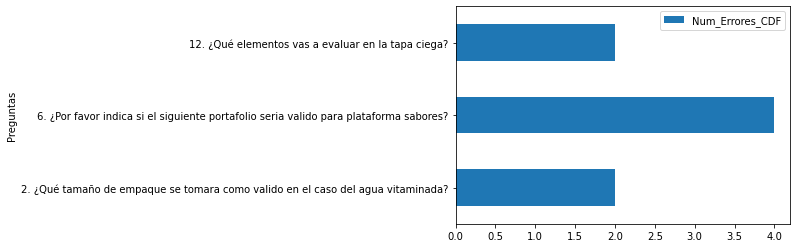

In [131]:
Pax = df_CDF_Quiz.plot.barh(y='Num_Errores_CDF', rot=0)

In [132]:
##############################################################################################################
##       FEMSA
###############################################################################################################

In [133]:
df_evaluacion_dic_ptMinus_20_FEMSA = df_evaluacion_dic_ptMinus_20.loc[df_evaluacion_dic_ptMinus_20['Estudio que evalúas'] == "FEMSA"]


In [134]:
df4_1  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="1. ¿Qué producto se tomara como valido para plataforma hidratación?", how='outer', indicator='Exist')
df4_1  = df4_1.loc[df4_1['Exist'] != 'both']
df4_1 = len(df4_1)
print("Pregunta 1:")
print(df4_1)

df4_2  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?", how='outer', indicator='Exist')
df4_2  = df4_2.loc[df4_2['Exist'] != 'both']
df4_2 = len(df4_2)
print("Pregunta 2:")
print(df4_2)

df4_3  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?", how='outer', indicator='Exist')
df4_3  = df4_3.loc[df4_3['Exist'] != 'both']
df4_3 = len(df4_3)
print("Pregunta 3:")
print(df4_3)

df4_4  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?", how='outer', indicator='Exist')
df4_4  = df4_4.loc[df4_4['Exist'] != 'both']
df4_4 = len(df4_4)
print("Pregunta 4:")
print(df4_4)

df4_5  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="5. ¿Cuál es el portafolio valido para la plataforma sabores?", how='outer', indicator='Exist')
df4_5  = df4_5.loc[df4_5['Exist'] != 'both']
df4_5 = len(df4_5)
print("Pregunta 5:")
print(df4_5)

df4_6  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_6  = df4_6.loc[df4_6['Exist'] != 'both']
df4_6 = len(df4_6)
print("Pregunta 6:")
print(df4_6)

df4_7  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_7  = df4_7.loc[df4_7['Exist'] != 'both']
df4_7 = len(df4_7)
print("Pregunta 7:")
print(df4_7)

df4_8  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="8. ¿La encuesta de satisfacción de elimina de canal tradicional?", how='outer', indicator='Exist')
df4_8  = df4_8.loc[df4_8['Exist'] != 'both']
df4_8 = len(df4_8)
print("Pregunta 8:")
print(df4_8)

df4_9  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?", how='outer', indicator='Exist')
df4_9  = df4_9.loc[df4_9['Exist'] != 'both']
df4_9 = len(df4_9)
print("Pregunta 9:")
print(df4_9)

df4_10  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?", how='outer', indicator='Exist')
df4_10  = df4_10.loc[df4_10['Exist'] != 'both']
df4_10 = len(df4_10)
print("Pregunta 10:")
print(df4_10)

df4_11  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="11. ¿Qué material se dio de alta para Puestos fijos?", how='outer', indicator='Exist')
df4_11  = df4_11.loc[df4_11['Exist'] != 'both']
df4_11 = len(df4_11)
print("Pregunta 11:")
print(df4_11)

df4_12  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="12. ¿Qué elementos vas a evaluar en la tapa ciega?", how='outer', indicator='Exist')
df4_12  = df4_12.loc[df4_12['Exist'] != 'both']
df4_12 = len(df4_12)
print("Pregunta 12:")
print(df4_12)

df4_13  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_13  = df4_13.loc[df4_13['Exist'] != 'both']
df4_13 = len(df4_13)
print("Pregunta 13:")
print(df4_13)

df4_14  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_14  = df4_14.loc[df4_14['Exist'] != 'both']
df4_14 = len(df4_14)
print("Pregunta 14:")
print(df4_14)

df4_15  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?", how='outer', indicator='Exist')
df4_15  = df4_15.loc[df4_15['Exist'] != 'both']
df4_15 = len(df4_15)
print("Pregunta 15:")
print(df4_15)

df4_16  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_FEMSA, on="16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?", how='outer', indicator='Exist')
df4_16  = df4_16.loc[df4_16['Exist'] != 'both']
df4_16 = len(df4_16)
print("Pregunta 16:")
print(df4_16)

Pregunta 1:
1
Pregunta 2:
10
Pregunta 3:
2
Pregunta 4:
0
Pregunta 5:
5
Pregunta 6:
15
Pregunta 7:
0
Pregunta 8:
6
Pregunta 9:
3
Pregunta 10:
8
Pregunta 11:
1
Pregunta 12:
6
Pregunta 13:
13
Pregunta 14:
2
Pregunta 15:
1
Pregunta 16:
7


In [135]:
dff = {'index1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 'Num_Errores_FEMSA': [1,10,2,0,5,15,0,6,3,8,1,6,13,2,1,7]}
df_FEMSA_Quiz = pd.DataFrame(data=dff)
df_FEMSA_Quiz

,index1,Num_Errores_FEMSA
0,1,1
1,2,10
2,3,2
3,4,0
4,5,5
5,6,15
6,7,0
7,8,6
8,9,3
9,10,8


In [136]:
df_FEMSA=df_FEMSA_Quiz.merge(df_t, how='inner', on='index1')
df_FEMSA

,index1,Num_Errores_FEMSA,Preguntas
0,1,1,1. ¿Qué producto se tomara como valido para pl...
1,2,10,2. ¿Qué tamaño de empaque se tomara como valid...
2,3,2,3. ¿Qué plataforma ya no se evaluara en el mes...
3,4,0,4. ¿Cuál es el nombre de la nueva plataforma q...
4,5,5,5. ¿Cuál es el portafolio valido para la plata...
5,6,15,6. ¿Por favor indica si el siguiente portafoli...
6,7,0,7. ¿Por favor indica si el siguiente portafoli...
7,8,6,8. ¿La encuesta de satisfacción de elimina de ...
8,9,3,9. ¿En caso de encontrar una exhibición como l...
9,10,8,"10. ¿La encuesta de satisfacción, se elimina d..."


In [137]:
df_FEMSA=df_FEMSA[['Preguntas', 'Num_Errores_FEMSA']]
df_FEMSA

,Preguntas,Num_Errores_FEMSA
0,1. ¿Qué producto se tomara como valido para pl...,1
1,2. ¿Qué tamaño de empaque se tomara como valid...,10
2,3. ¿Qué plataforma ya no se evaluara en el mes...,2
3,4. ¿Cuál es el nombre de la nueva plataforma q...,0
4,5. ¿Cuál es el portafolio valido para la plata...,5
5,6. ¿Por favor indica si el siguiente portafoli...,15
6,7. ¿Por favor indica si el siguiente portafoli...,0
7,8. ¿La encuesta de satisfacción de elimina de ...,6
8,9. ¿En caso de encontrar una exhibición como l...,3
9,"10. ¿La encuesta de satisfacción, se elimina d...",8


In [138]:
df_FEMSA_not_NULL  = df_FEMSA.loc[df_FEMSA['Num_Errores_FEMSA'] > 6]
df_FEMSA_not_NULL

,Preguntas,Num_Errores_FEMSA
1,2. ¿Qué tamaño de empaque se tomara como valid...,10
5,6. ¿Por favor indica si el siguiente portafoli...,15
9,"10. ¿La encuesta de satisfacción, se elimina d...",8
12,13. ¿En la siguiente exhibición se debe de mar...,13
15,16. ¿En que cadenas se deben de tomar las foto...,7


In [139]:
df_FEMSA_Quiz = df_FEMSA_not_NULL.set_index('Preguntas')
df_FEMSA_Quiz

,Num_Errores_FEMSA
Preguntas,
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,10
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,15
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",8
13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?,13
16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?,7


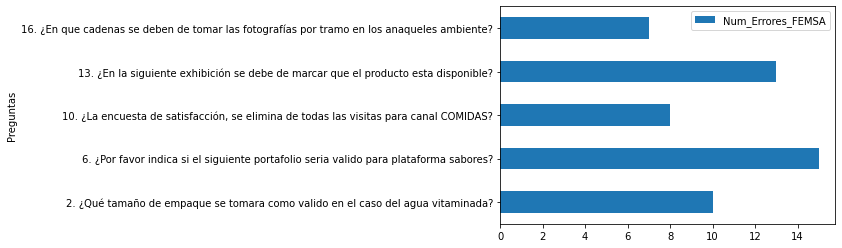

In [140]:
Pax = df_FEMSA_Quiz.plot.barh(y='Num_Errores_FEMSA', rot=0)

In [141]:
############################################################################################################
##       NAYAR
###############################################################################################################

In [142]:
df_evaluacion_dic_ptMinus_20_NAYAR = df_evaluacion_dic_ptMinus_20.loc[df_evaluacion_dic_ptMinus_20['Estudio que evalúas'] == "NAYAR"]


In [143]:
df4_1  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="1. ¿Qué producto se tomara como valido para plataforma hidratación?", how='outer', indicator='Exist')
df4_1  = df4_1.loc[df4_1['Exist'] != 'both']
df4_1 = len(df4_1)
print("Pregunta 1:")
print(df4_1)

df4_2  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?", how='outer', indicator='Exist')
df4_2  = df4_2.loc[df4_2['Exist'] != 'both']
df4_2 = len(df4_2)
print("Pregunta 2:")
print(df4_2)

df4_3  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?", how='outer', indicator='Exist')
df4_3  = df4_3.loc[df4_3['Exist'] != 'both']
df4_3 = len(df4_3)
print("Pregunta 3:")
print(df4_3)

df4_4  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?", how='outer', indicator='Exist')
df4_4  = df4_4.loc[df4_4['Exist'] != 'both']
df4_4 = len(df4_4)
print("Pregunta 4:")
print(df4_4)

df4_5  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="5. ¿Cuál es el portafolio valido para la plataforma sabores?", how='outer', indicator='Exist')
df4_5  = df4_5.loc[df4_5['Exist'] != 'both']
df4_5 = len(df4_5)
print("Pregunta 5:")
print(df4_5)

df4_6  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_6  = df4_6.loc[df4_6['Exist'] != 'both']
df4_6 = len(df4_6)
print("Pregunta 6:")
print(df4_6)

df4_7  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_7  = df4_7.loc[df4_7['Exist'] != 'both']
df4_7 = len(df4_7)
print("Pregunta 7:")
print(df4_7)

df4_8  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="8. ¿La encuesta de satisfacción de elimina de canal tradicional?", how='outer', indicator='Exist')
df4_8  = df4_8.loc[df4_8['Exist'] != 'both']
df4_8 = len(df4_8)
print("Pregunta 8:")
print(df4_8)

df4_9  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?", how='outer', indicator='Exist')
df4_9  = df4_9.loc[df4_9['Exist'] != 'both']
df4_9 = len(df4_9)
print("Pregunta 9:")
print(df4_9)

df4_10  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?", how='outer', indicator='Exist')
df4_10  = df4_10.loc[df4_10['Exist'] != 'both']
df4_10 = len(df4_10)
print("Pregunta 10:")
print(df4_10)

df4_11  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="11. ¿Qué material se dio de alta para Puestos fijos?", how='outer', indicator='Exist')
df4_11  = df4_11.loc[df4_11['Exist'] != 'both']
df4_11 = len(df4_11)
print("Pregunta 11:")
print(df4_11)

df4_12  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="12. ¿Qué elementos vas a evaluar en la tapa ciega?", how='outer', indicator='Exist')
df4_12  = df4_12.loc[df4_12['Exist'] != 'both']
df4_12 = len(df4_12)
print("Pregunta 12:")
print(df4_12)

df4_13  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_13  = df4_13.loc[df4_13['Exist'] != 'both']
df4_13 = len(df4_13)
print("Pregunta 13:")
print(df4_13)

df4_14  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_14  = df4_14.loc[df4_14['Exist'] != 'both']
df4_14 = len(df4_14)
print("Pregunta 14:")
print(df4_14)

df4_15  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?", how='outer', indicator='Exist')
df4_15  = df4_15.loc[df4_15['Exist'] != 'both']
df4_15 = len(df4_15)
print("Pregunta 15:")
print(df4_15)

df4_16  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_NAYAR, on="16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?", how='outer', indicator='Exist')
df4_16  = df4_16.loc[df4_16['Exist'] != 'both']
df4_16 = len(df4_16)
print("Pregunta 16:")
print(df4_16)

Pregunta 1:
0
Pregunta 2:
0
Pregunta 3:
0
Pregunta 4:
0
Pregunta 5:
0
Pregunta 6:
1
Pregunta 7:
0
Pregunta 8:
0
Pregunta 9:
0
Pregunta 10:
1
Pregunta 11:
0
Pregunta 12:
0
Pregunta 13:
0
Pregunta 14:
0
Pregunta 15:
0
Pregunta 16:
1


In [144]:
dff = {'index1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 'Num_Errores_NAYAR': [0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1]}
df_NAYAR_Quiz = pd.DataFrame(data=dff)
df_NAYAR_Quiz 

,index1,Num_Errores_NAYAR
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,0
7,8,0
8,9,0
9,10,1


In [145]:
df_t['Preguntas'] = df_t.index
df_t

,index1,Preguntas
1. ¿Qué producto se tomara como valido para plataforma hidratación?,1,1. ¿Qué producto se tomara como valido para pl...
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,2,2. ¿Qué tamaño de empaque se tomara como valid...
3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?,3,3. ¿Qué plataforma ya no se evaluara en el mes...
4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?,4,4. ¿Cuál es el nombre de la nueva plataforma q...
5. ¿Cuál es el portafolio valido para la plataforma sabores?,5,5. ¿Cuál es el portafolio valido para la plata...
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,6,6. ¿Por favor indica si el siguiente portafoli...
7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,7,7. ¿Por favor indica si el siguiente portafoli...
8. ¿La encuesta de satisfacción de elimina de canal tradicional?,8,8. ¿La encuesta de satisfacción de elimina de ...
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?",9,9. ¿En caso de encontrar una exhibición como l...
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",10,"10. ¿La encuesta de satisfacción, se elimina d..."


In [146]:
df_NAYAR=df_NAYAR_Quiz.merge(df_t, how='inner', on='index1')
df_NAYAR

,index1,Num_Errores_NAYAR,Preguntas
0,1,0,1. ¿Qué producto se tomara como valido para pl...
1,2,0,2. ¿Qué tamaño de empaque se tomara como valid...
2,3,0,3. ¿Qué plataforma ya no se evaluara en el mes...
3,4,0,4. ¿Cuál es el nombre de la nueva plataforma q...
4,5,0,5. ¿Cuál es el portafolio valido para la plata...
5,6,1,6. ¿Por favor indica si el siguiente portafoli...
6,7,0,7. ¿Por favor indica si el siguiente portafoli...
7,8,0,8. ¿La encuesta de satisfacción de elimina de ...
8,9,0,9. ¿En caso de encontrar una exhibición como l...
9,10,1,"10. ¿La encuesta de satisfacción, se elimina d..."


In [147]:
df_NAYAR=df_NAYAR[['Preguntas', 'Num_Errores_NAYAR']]
df_NAYAR

,Preguntas,Num_Errores_NAYAR
0,1. ¿Qué producto se tomara como valido para pl...,0
1,2. ¿Qué tamaño de empaque se tomara como valid...,0
2,3. ¿Qué plataforma ya no se evaluara en el mes...,0
3,4. ¿Cuál es el nombre de la nueva plataforma q...,0
4,5. ¿Cuál es el portafolio valido para la plata...,0
5,6. ¿Por favor indica si el siguiente portafoli...,1
6,7. ¿Por favor indica si el siguiente portafoli...,0
7,8. ¿La encuesta de satisfacción de elimina de ...,0
8,9. ¿En caso de encontrar una exhibición como l...,0
9,"10. ¿La encuesta de satisfacción, se elimina d...",1


In [149]:
df_NAYAR_not_NULL  = df_NAYAR.loc[df_NAYAR['Num_Errores_NAYAR'] > 0]
df_NAYAR_not_NULL

,Preguntas,Num_Errores_NAYAR
5,6. ¿Por favor indica si el siguiente portafoli...,1
9,"10. ¿La encuesta de satisfacción, se elimina d...",1
15,16. ¿En que cadenas se deben de tomar las foto...,1


In [150]:
df_NAYAR_Quiz = df_NAYAR_not_NULL.set_index('Preguntas')
df_NAYAR_Quiz

,Num_Errores_NAYAR
Preguntas,
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,1
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",1
16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?,1


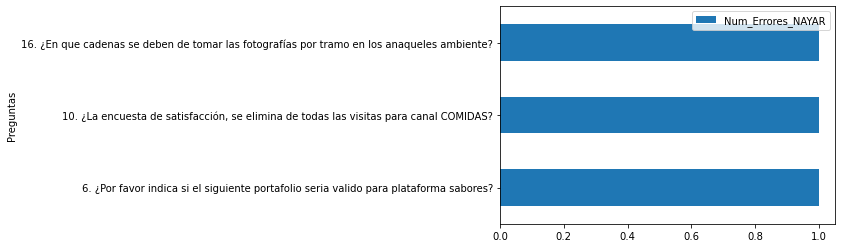

In [151]:
Pax = df_NAYAR_Quiz.plot.barh(y='Num_Errores_NAYAR', rot=0)

In [152]:
#############################################################################################################
##       RICA
###############################################################################################################


In [153]:

df_evaluacion_dic_ptMinus_20_RICA = df_evaluacion_dic_ptMinus_20.loc[df_evaluacion_dic_ptMinus_20['Estudio que evalúas'] == "RICA"]


In [154]:
df4_1  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="1. ¿Qué producto se tomara como valido para plataforma hidratación?", how='outer', indicator='Exist')
df4_1  = df4_1.loc[df4_1['Exist'] != 'both']
df4_1 = len(df4_1)
print("Pregunta 1:")
print(df4_1)

df4_2  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?", how='outer', indicator='Exist')
df4_2  = df4_2.loc[df4_2['Exist'] != 'both']
df4_2 = len(df4_2)
print("Pregunta 2:")
print(df4_2)

df4_3  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?", how='outer', indicator='Exist')
df4_3  = df4_3.loc[df4_3['Exist'] != 'both']
df4_3 = len(df4_3)
print("Pregunta 3:")
print(df4_3)

df4_4  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?", how='outer', indicator='Exist')
df4_4  = df4_4.loc[df4_4['Exist'] != 'both']
df4_4 = len(df4_4)
print("Pregunta 4:")
print(df4_4)

df4_5  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="5. ¿Cuál es el portafolio valido para la plataforma sabores?", how='outer', indicator='Exist')
df4_5  = df4_5.loc[df4_5['Exist'] != 'both']
df4_5 = len(df4_5)
print("Pregunta 5:")
print(df4_5)

df4_6  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_6  = df4_6.loc[df4_6['Exist'] != 'both']
df4_6 = len(df4_6)
print("Pregunta 6:")
print(df4_6)

df4_7  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?", how='outer', indicator='Exist')
df4_7  = df4_7.loc[df4_7['Exist'] != 'both']
df4_7 = len(df4_7)
print("Pregunta 7:")
print(df4_7)

df4_8  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="8. ¿La encuesta de satisfacción de elimina de canal tradicional?", how='outer', indicator='Exist')
df4_8  = df4_8.loc[df4_8['Exist'] != 'both']
df4_8 = len(df4_8)
print("Pregunta 8:")
print(df4_8)

df4_9  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?", how='outer', indicator='Exist')
df4_9  = df4_9.loc[df4_9['Exist'] != 'both']
df4_9 = len(df4_9)
print("Pregunta 9:")
print(df4_9)

df4_10  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?", how='outer', indicator='Exist')
df4_10  = df4_10.loc[df4_10['Exist'] != 'both']
df4_10 = len(df4_10)
print("Pregunta 10:")
print(df4_10)

df4_11  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="11. ¿Qué material se dio de alta para Puestos fijos?", how='outer', indicator='Exist')
df4_11  = df4_11.loc[df4_11['Exist'] != 'both']
df4_11 = len(df4_11)
print("Pregunta 11:")
print(df4_11)

df4_12  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="12. ¿Qué elementos vas a evaluar en la tapa ciega?", how='outer', indicator='Exist')
df4_12  = df4_12.loc[df4_12['Exist'] != 'both']
df4_12 = len(df4_12)
print("Pregunta 12:")
print(df4_12)

df4_13  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="13. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_13  = df4_13.loc[df4_13['Exist'] != 'both']
df4_13 = len(df4_13)
print("Pregunta 13:")
print(df4_13)

df4_14  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="14. ¿En la siguiente exhibición se debe de marcar que el producto esta disponible?", how='outer', indicator='Exist')
df4_14  = df4_14.loc[df4_14['Exist'] != 'both']
df4_14 = len(df4_14)
print("Pregunta 14:")
print(df4_14)

df4_15  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="15. ¿En que marca de leches se debe de ingresar el ADES NATURAL?", how='outer', indicator='Exist')
df4_15  = df4_15.loc[df4_15['Exist'] != 'both']
df4_15 = len(df4_15)
print("Pregunta 15:")
print(df4_15)

df4_16  = pd.merge(df_evaluacion_dic_ptEqual20, df_evaluacion_dic_ptMinus_20_RICA, on="16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?", how='outer', indicator='Exist')
df4_16  = df4_16.loc[df4_16['Exist'] != 'both']
df4_16 = len(df4_16)
print("Pregunta 16:")
print(df4_16)

Pregunta 1:
0
Pregunta 2:
2
Pregunta 3:
0
Pregunta 4:
0
Pregunta 5:
0
Pregunta 6:
0
Pregunta 7:
0
Pregunta 8:
0
Pregunta 9:
2
Pregunta 10:
0
Pregunta 11:
0
Pregunta 12:
0
Pregunta 13:
0
Pregunta 14:
0
Pregunta 15:
0
Pregunta 16:
2


In [155]:
dff = {'index1': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], 'Num_Errores_RICA': [0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,2]}
df_RICA_Quiz = pd.DataFrame(data=dff)
df_RICA_Quiz

,index1,Num_Errores_RICA
0,1,0
1,2,2
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,2
9,10,0


In [156]:
df_t['Preguntas'] = df_t.index
df_t

,index1,Preguntas
1. ¿Qué producto se tomara como valido para plataforma hidratación?,1,1. ¿Qué producto se tomara como valido para pl...
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,2,2. ¿Qué tamaño de empaque se tomara como valid...
3. ¿Qué plataforma ya no se evaluara en el mes de diciembre?,3,3. ¿Qué plataforma ya no se evaluara en el mes...
4. ¿Cuál es el nombre de la nueva plataforma que se evaluara en diciembre?,4,4. ¿Cuál es el nombre de la nueva plataforma q...
5. ¿Cuál es el portafolio valido para la plataforma sabores?,5,5. ¿Cuál es el portafolio valido para la plata...
6. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,6,6. ¿Por favor indica si el siguiente portafoli...
7. ¿Por favor indica si el siguiente portafolio seria valido para plataforma sabores?,7,7. ¿Por favor indica si el siguiente portafoli...
8. ¿La encuesta de satisfacción de elimina de canal tradicional?,8,8. ¿La encuesta de satisfacción de elimina de ...
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?",9,9. ¿En caso de encontrar una exhibición como l...
"10. ¿La encuesta de satisfacción, se elimina de todas las visitas para canal COMIDAS?",10,"10. ¿La encuesta de satisfacción, se elimina d..."


In [157]:
df_RICA=df_RICA_Quiz.merge(df_t, how='inner', on='index1')
df_RICA

,index1,Num_Errores_RICA,Preguntas
0,1,0,1. ¿Qué producto se tomara como valido para pl...
1,2,2,2. ¿Qué tamaño de empaque se tomara como valid...
2,3,0,3. ¿Qué plataforma ya no se evaluara en el mes...
3,4,0,4. ¿Cuál es el nombre de la nueva plataforma q...
4,5,0,5. ¿Cuál es el portafolio valido para la plata...
5,6,0,6. ¿Por favor indica si el siguiente portafoli...
6,7,0,7. ¿Por favor indica si el siguiente portafoli...
7,8,0,8. ¿La encuesta de satisfacción de elimina de ...
8,9,2,9. ¿En caso de encontrar una exhibición como l...
9,10,0,"10. ¿La encuesta de satisfacción, se elimina d..."


In [158]:
df_RICA=df_RICA[['Preguntas', 'Num_Errores_RICA']]
df_RICA

,Preguntas,Num_Errores_RICA
0,1. ¿Qué producto se tomara como valido para pl...,0
1,2. ¿Qué tamaño de empaque se tomara como valid...,2
2,3. ¿Qué plataforma ya no se evaluara en el mes...,0
3,4. ¿Cuál es el nombre de la nueva plataforma q...,0
4,5. ¿Cuál es el portafolio valido para la plata...,0
5,6. ¿Por favor indica si el siguiente portafoli...,0
6,7. ¿Por favor indica si el siguiente portafoli...,0
7,8. ¿La encuesta de satisfacción de elimina de ...,0
8,9. ¿En caso de encontrar una exhibición como l...,2
9,"10. ¿La encuesta de satisfacción, se elimina d...",0


In [159]:
df_RICA_not_NULL  = df_RICA.loc[df_RICA['Num_Errores_RICA'] > 1]
df_RICA_not_NULL

,Preguntas,Num_Errores_RICA
1,2. ¿Qué tamaño de empaque se tomara como valid...,2
8,9. ¿En caso de encontrar una exhibición como l...,2
15,16. ¿En que cadenas se deben de tomar las foto...,2


In [160]:
df_RICA_Quiz = df_RICA_not_NULL.set_index('Preguntas')
df_RICA_Quiz

,Num_Errores_RICA
Preguntas,
2. ¿Qué tamaño de empaque se tomara como valido en el caso del agua vitaminada?,2
"9. ¿En caso de encontrar una exhibición como la que se muestra en la imagen, con que plataforma se debe de evaluar?",2
16. ¿En que cadenas se deben de tomar las fotografías por tramo en los anaqueles ambiente?,2


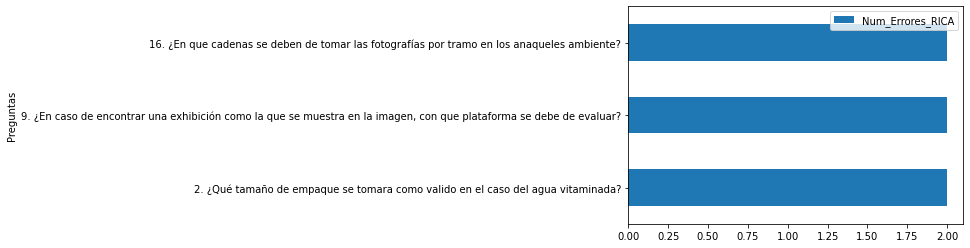

In [161]:
Pax = df_RICA_Quiz.plot.barh(y='Num_Errores_RICA', rot=0)

In [162]:
df_100 = df_evaluacion_dic.loc[df_evaluacion_dic['Calificacion'] == 1.00]

In [163]:
df_100=df_100[['NOMBRE COMPLETO', 'Calificacion']]
df_100

,NOMBRE COMPLETO,Calificacion
0,SUAREZ SANCHEZ JORGE,1.0
4,SANCHEZ HERNANDEZ GERARDO MARTIN,1.0
6,Carreón Rodríguez Areli Paulina,1.0
7,MARTINEZ BARRERA JORGE LUIS,1.0
8,SANTIAGO HERNANDEZ CLAUDIA JACQUELINE,1.0
...,...,...
127,HERNANDEZ FUENTES ARTURO,1.0
129,CERVANTES CHAVARRIA MARTHA PATRICIA,1.0
131,RUIZ GARCIA MAURICIO,1.0
134,PARRA CASTRO RICARDO,1.0


In [164]:
writer_orig = pd.ExcelWriter(r"C:\Users\Lenovo\OneDrive - Storecheck S.A. de C.V\Documentos\Area_Training\Entregable_Dic\Entregable.xlsx", engine='xlsxwriter')
Suma_de_Califs_obtenidas.to_excel(writer_orig, index=False, sheet_name='Hoja1')
Califs_Por_Embotellador.to_excel(writer_orig, index=False, sheet_name='Hoja2')
df_prom.to_excel(writer_orig, index=False, sheet_name='Hoja3')
df.to_excel(writer_orig, index=False, sheet_name='Hoja4')
df_100.to_excel(writer_orig, index=False, sheet_name='Hoja5')
writer_orig.save()